In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('data_assign.xlsx')
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [5]:
df.shape

(7, 2)

In [6]:
x = df['Weight']
y = df['Price']

In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [8]:
mean_x

np.float64(4.571428571428571)

In [9]:
mean_y

np.float64(47.142857142857146)

In [11]:
dev_x = x - mean_x
dev_y = y -mean_y

In [14]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
print(m)

2.620967741935484


In [15]:
c = mean_y - m*mean_x
print(c)

35.16129032258065


In [16]:
pred_6 = m*6 + c
pred_6

np.float64(50.88709677419355)

In [26]:
print(m, c)

2.620967741935484 35.16129032258065


Text(0.5, 1.0, 'Weight data sheet')

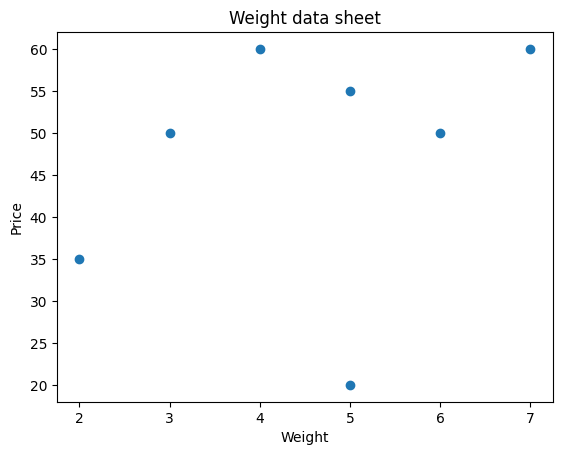

In [21]:
plt.scatter(x, y)
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title("Weight data sheet")

In [22]:
df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [25]:
reg.fit(df[['Weight']], df['Price'])

LinearRegression()

In [27]:
reg.coef_

array([2.62096774])

In [28]:
reg.intercept_

np.float64(35.16129032258065)

In [31]:
reg.predict([[6]])

array([50.88709677])

In [33]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [35]:
df['predicted'] = reg.predict(df[['Weight']])
df

,Weight,Price,predicted
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [37]:
df['residuals'] = df['Price'] - df['predicted']
df

,Weight,Price,predicted,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
mse = mean_squared_error(df[['predicted']], df[['Price']])
mse

np.float64(167.30990783410135)

In [40]:
mae = mean_absolute_error(df.predicted, df.Price)
mae

np.float64(9.87327188940092)

Text(0.5, 1.0, 'Weight data sheet')

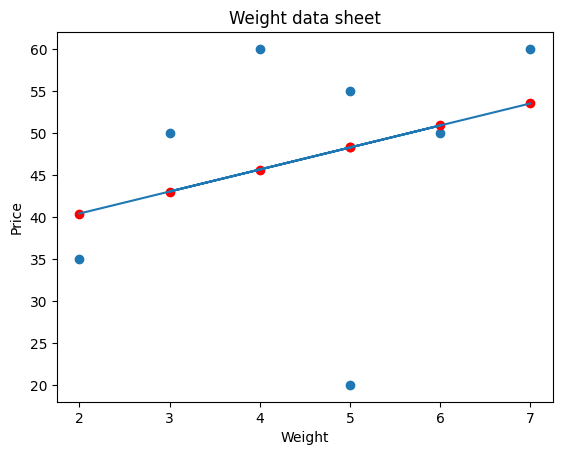

In [45]:
plt.scatter(x, y)
plt.plot(x, df.predicted)
plt.scatter(x, df.predicted, color='red')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title("Weight data sheet")